In [49]:
import random
import numpy as np
import pandas as pd
import timeit
import time
from scipy.stats import linregress
%timeit
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
#from config import g_key
from datetime import datetime #Import the datetime module from the datelime library
import matplotlib.pyplot as plt
import gmaps

In [2]:
#Create a set of random latitutes and longitudes
lats = np.random.uniform(low=-90.000,high = 90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)
#cities

617

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = ""

Beginning Data Retrieval     
-----------------------------


In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
for i, city in enumerate(cities):
    
    #Group cities in sets of 50
    if (i%50==0 and i>=50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #print(city_url)
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"City not found. Skipping...Set:{set_count}")
        #print(city_url)
        pass
    
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...Set:1
City not found. Skipping...Set:2
City not found. Skipping...Set:2
City not found. Skipping...Set:2
City not found. Skipping...Set:2
City not found. Skipping...Set:3
City not found. Skipping...Set:3
City not found. Skipping...Set:3
City not found. Skipping...Set:3
City not found. Skipping...Set:4
City not found. Skipping...Set:4
City not found. Skipping...Set:4
City not found. Skipping...Set:4
City not found. Skipping...Set:4
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:5
City not found. Skipping...Set:6
City not found. Skipping...Set:6
City not found. Skipping...Set:6
City not found. Skipping...Set:6
City not found. Skipping...Set:6
City not found. Skipping...Set:6
City not found. Skipping...Set:7
City not f

In [5]:
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,60.58,89,100,2.48,US,2021-09-26 02:35:25
1,Synya,65.3718,58.0387,36.21,80,100,3.33,RU,2021-09-26 02:39:43
2,Shizukuishi,39.6833,140.9833,68.77,78,100,6.04,JP,2021-09-26 02:39:43
3,Longyearbyen,78.2186,15.6401,39.04,87,75,6.91,SJ,2021-09-26 02:35:26
4,Kodinar,20.7903,70.7031,80.33,80,79,7.14,IN,2021-09-26 02:39:44
...,...,...,...,...,...,...,...,...,...
557,Pochutla,15.7432,-96.4661,78.82,91,93,4.09,MX,2021-09-26 02:34:06
558,Half Moon Bay,37.4636,-122.4286,66.74,85,90,4.61,US,2021-09-26 02:35:39
559,Mehamn,71.0357,27.8492,45.63,88,96,15.30,NO,2021-09-26 02:35:37
560,Hendek,40.7994,30.7481,55.67,76,0,3.67,TR,2021-09-26 02:43:02


In [7]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-09-26 02:35:25,42.6001,-73.9662,60.58,89,100,2.48
1,Synya,RU,2021-09-26 02:39:43,65.3718,58.0387,36.21,80,100,3.33
2,Shizukuishi,JP,2021-09-26 02:39:43,39.6833,140.9833,68.77,78,100,6.04
3,Longyearbyen,SJ,2021-09-26 02:35:26,78.2186,15.6401,39.04,87,75,6.91
4,Kodinar,IN,2021-09-26 02:39:44,20.7903,70.7031,80.33,80,79,7.14
...,...,...,...,...,...,...,...,...,...
557,Pochutla,MX,2021-09-26 02:34:06,15.7432,-96.4661,78.82,91,93,4.09
558,Half Moon Bay,US,2021-09-26 02:35:39,37.4636,-122.4286,66.74,85,90,4.61
559,Mehamn,NO,2021-09-26 02:35:37,71.0357,27.8492,45.63,88,96,15.30
560,Hendek,TR,2021-09-26 02:43:02,40.7994,30.7481,55.67,76,0,3.67


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
#today = time.time()

#Get today in correct format
today = time.strftime("%x")
today

'09/25/21'

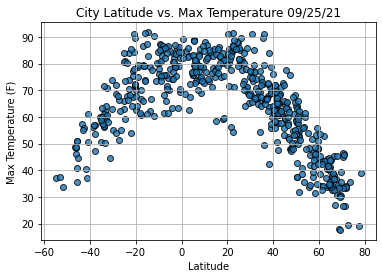

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

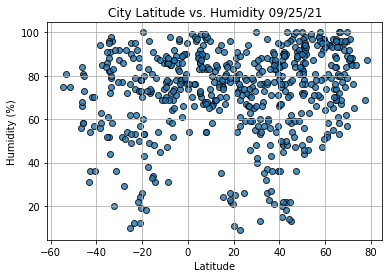

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

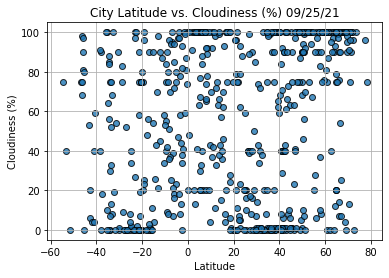

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

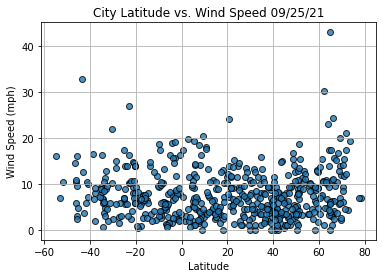

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-09-26 02:35:25,42.6001,-73.9662,60.58,89,100,2.48
1,Synya,RU,2021-09-26 02:39:43,65.3718,58.0387,36.21,80,100,3.33
2,Shizukuishi,JP,2021-09-26 02:39:43,39.6833,140.9833,68.77,78,100,6.04
3,Longyearbyen,SJ,2021-09-26 02:35:26,78.2186,15.6401,39.04,87,75,6.91
4,Kodinar,IN,2021-09-26 02:39:44,20.7903,70.7031,80.33,80,79,7.14
...,...,...,...,...,...,...,...,...,...
557,Pochutla,MX,2021-09-26 02:34:06,15.7432,-96.4661,78.82,91,93,4.09
558,Half Moon Bay,US,2021-09-26 02:35:39,37.4636,-122.4286,66.74,85,90,4.61
559,Mehamn,NO,2021-09-26 02:35:37,71.0357,27.8492,45.63,88,96,15.30
560,Hendek,TR,2021-09-26 02:43:02,40.7994,30.7481,55.67,76,0,3.67


In [16]:
index13 = city_data_df.loc[13]
index13

City                      Berbera
Country                        SO
Date          2021-09-26 02:39:46
Lat                       10.4396
Lng                       45.0143
Max Temp                    87.98
Humidity                       58
Cloudiness                     37
Wind Speed                   3.69
Name: 13, dtype: object

In [17]:
city_data_df.loc[city_data_df["Lat"]>=0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-09-26 02:35:25,42.6001,-73.9662,60.58,89,100,2.48
1,Synya,RU,2021-09-26 02:39:43,65.3718,58.0387,36.21,80,100,3.33
2,Shizukuishi,JP,2021-09-26 02:39:43,39.6833,140.9833,68.77,78,100,6.04
3,Longyearbyen,SJ,2021-09-26 02:35:26,78.2186,15.6401,39.04,87,75,6.91
4,Kodinar,IN,2021-09-26 02:39:44,20.7903,70.7031,80.33,80,79,7.14


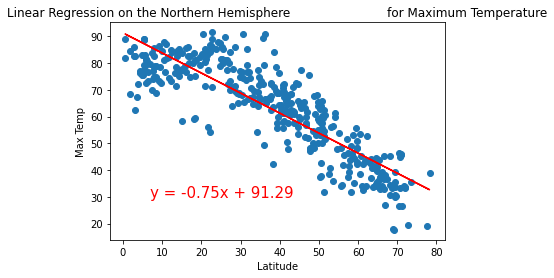

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(7,30))

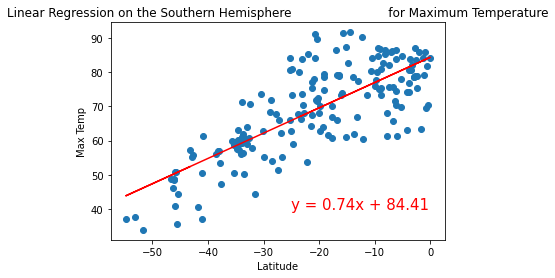

In [28]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,40))

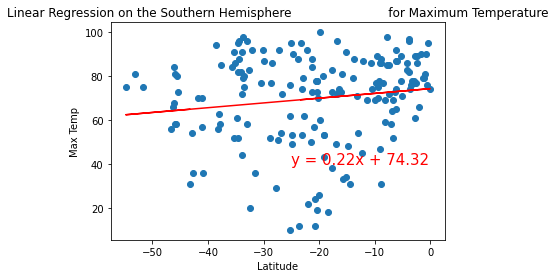

In [29]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Max Temp',(-25,40))

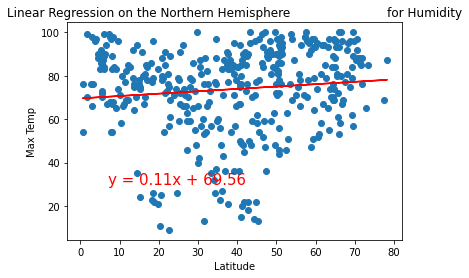

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Max Temp',(7,30))

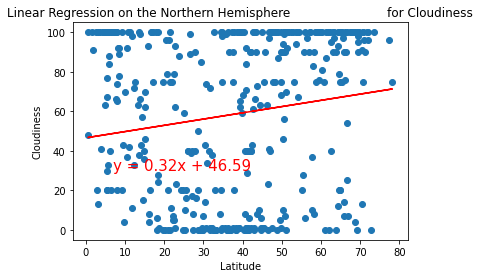

In [31]:
# Linear regression on the Cloudiness Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(7,30))

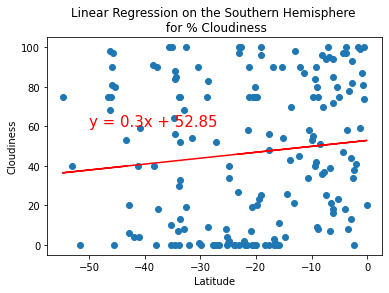

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       'Cloudiness',(-50,60))

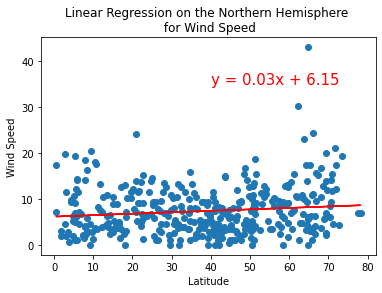

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

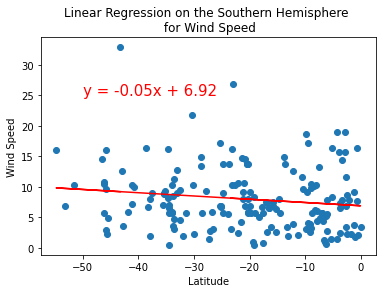

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

Note: you may need to restart the kernel to use updated packages.
